In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Importing and Reading the review metatrain dataset 
df = pd.read_csv('/content/1861059754_reviewmetatrain.csv')
# printing three rows of the dataset
df.head(3)

,date,review_id,reviewer_id,business_id,vote_funny,vote_cool,vote_useful,rating
0,3/15/2012,-s77HISu8DVQ8F0HxmWW6A,mthr7h15a_z9m9jRI6mG6Q,m5_GCJP2W4zEJnyVgxa3eA,0,1,3,1
1,6/21/2010,A2aCzGCgg6gAbatHiCrPfA,rhM01fl3iU0xHr3TIpCMhQ,m5_GCJP2W4zEJnyVgxa3eA,0,0,0,5
2,7/29/2011,DK2pd,SNHKDgmGiLn5chUlhdLCkg,CwPi6NVuJIZZx4IBcTekFQ,1,0,1,5


In [0]:
# printing the shape of the dataset
df.shape

(28068, 8)

In [0]:
# checking for more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28068 entries, 0 to 28067
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         28068 non-null  object
 1   review_id    28068 non-null  object
 2   reviewer_id  28068 non-null  object
 3   business_id  28068 non-null  object
 4   vote_funny   28068 non-null  int64 
 5   vote_cool    28068 non-null  int64 
 6   vote_useful  28068 non-null  int64 
 7   rating       28068 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.7+ MB


In [0]:
# To get insights and statisics of the dataset
df.describe()

,vote_funny,vote_cool,vote_useful,rating
count,28068.000000,28068.000000,28068.000000,28068.000000
mean,0.479122,0.551055,0.851931,4.207924
std,1.795875,1.920980,2.049714,1.273828
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.000000,0.000000,5.000000
75%,0.000000,1.000000,1.000000,5.000000
max,78.000000,170.000000,84.000000,5.000000


In [0]:
# reading the text review content
text = pd.read_csv('/content/1102865911_reviewtexttrain.csv')


In [0]:
# creating a new column  called review length that the length of ecah review
df['review length'] = text['review'].apply(len)
# printing the new dataframe after adding a new column
df.head()

,date,review_id,reviewer_id,business_id,vote_funny,vote_cool,vote_useful,rating,review length
0,3/15/2012,-s77HISu8DVQ8F0HxmWW6A,mthr7h15a_z9m9jRI6mG6Q,m5_GCJP2W4zEJnyVgxa3eA,0,1,3,1,901
1,6/21/2010,A2aCzGCgg6gAbatHiCrPfA,rhM01fl3iU0xHr3TIpCMhQ,m5_GCJP2W4zEJnyVgxa3eA,0,0,0,5,1206
2,7/29/2011,DK2pd,SNHKDgmGiLn5chUlhdLCkg,CwPi6NVuJIZZx4IBcTekFQ,1,0,1,5,1248
3,3/10/2006,b3BkUiWJEKNQko,HXjk1RVfLMPeZxitnk1Auw,43rd1LKcZRIunySzbMsyLQ,17,3,3,3,320
4,8/28/2012,RabHhte,W0ny0BqO0OJ4K4aVnSIlBw,CwPi6NVuJIZZx4IBcTekFQ,0,0,0,3,957


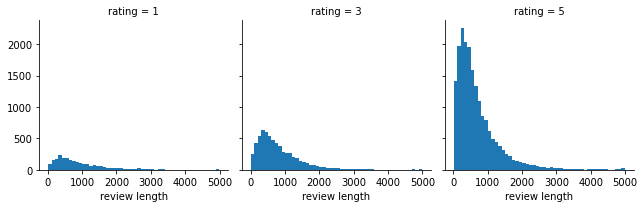

In [0]:
# trying to visualize more about the dataset by plotting graphs using seaborn
graph = sns.FacetGrid(data=df, col='rating')
graph.map(plt.hist, 'review length', bins=50)

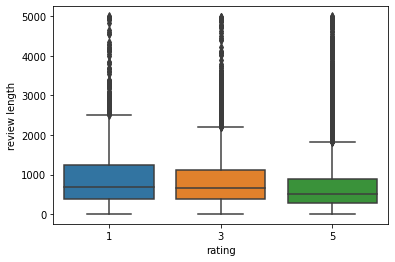

In [0]:
# creating a box plot of the review length for each rating
sns.boxplot(x='rating', y='review length', data=df)

In [0]:
# Grouping the data by rating and getting the correration
rating = df.groupby('rating').mean()
rating.corr()

,vote_funny,vote_cool,vote_useful,review length
vote_funny,1.000000,-0.518433,0.999822,0.776051
vote_cool,-0.518433,1.000000,-0.534489,-0.941628
vote_useful,0.999822,-0.534489,1.000000,0.787822
review length,0.776051,-0.941628,0.787822,1.000000


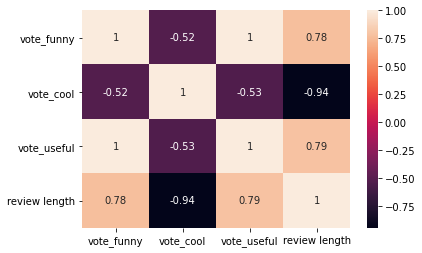

In [0]:
# Visualizing the correration
sns.heatmap(data=rating.corr(), annot=True)

In [0]:
# grabbing reviews that are either 1 or 5 stars from the yelp dataframe
df_class = df[(df['rating'] == 1) | (df['rating'] == 5)]
# printing the shape of the new dataframe
df_class.shape

(21624, 9)

In [0]:
# x is the review column of text
x = text['review']
# y will be the rating column.
y = df["rating"]

In [0]:
# printing a sample review
x[0]

"dear longman & eagle.......you've left me no choice. The ideas and menu looks and reads exceptionally. I WANT to eat everything on the menu, but over the multiple times that i've been there (not just one or two but many) the only consistent thing you do is serve overpriced crap. Went in one night and spent $24 on an over cooked piece of venison, went in another got UNDERcooked sweetbreads. Actually attempted dessert one night and the donuts tasted like three weeks of unchanged fryer oil, not to mention they tasted like fries..not donuts. Ordered the Tartar the other night...oh my god. You could smell it when it hit the table. Ground beef?!? REALLY!? Thats what you get, pre-portioned two days before, brown, and wreaks. I'm glad they have a great whiskey list because getting shit faced was the only way i got through the LAST meal i'll ever eat at longman. Thanks for a memorable anniversary\n"

In [0]:
# text pre-processing
import string
def process(text_data):

  '''
    Takes in a string of text, then performs the following:
    Remove all punctuation
    Remove all stopwords
    Return the cleaned text as a list of words
  '''
  no_punctuations = [char for char in text_data if char not in string.punctuation]
  no_punctuations = ''.join(no_punctuations)
    
  return [word for word in no_punctuations.split() if word.lower() not in stopwords.words('english')]

In [0]:
# This is a fix to the error that is caused when trying to download stopwords from ntlk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# Vectorization
# importing CountVectorizer from sklearn
# I used Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer = CountVectorizer(analyzer=process).fit(x)

In [0]:
# initializing CountVectorizer
cv = CountVectorizer()

In [0]:
# transforming x from text to vector
X = bow_transformer.transform(x)

In [0]:
X

<28068x75767 sparse matrix of type '<class 'numpy.int64'>'
	with 1705947 stored elements in Compressed Sparse Row format>

In [0]:
# importing train_test_split from skleran
from sklearn.model_selection import train_test_split

In [0]:
# split the adata X and y into a training and a test set 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [0]:
# To load the matrix
pd.read_csv(r"/content/review_text_train_doc2vec50.csv", index_col = False, delimiter = ',', header=None)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.878508,-0.921865,1.041951,-0.442659,0.314465,0.516447,-0.483630,1.740442,1.186326,0.975157,0.240855,-1.138737,-1.924330,0.410849,0.406934,0.757620,2.621696,0.110448,0.354627,-2.000492,-0.366355,-0.181569,-1.662840,-0.799695,0.236747,0.506606,-1.509163,-0.676210,-0.020707,1.389145,0.001054,0.732240,0.511119,-0.771108,0.486529,-1.287985,0.239611,-1.302464,0.156827,-0.142701,0.034335,1.886912,-0.810600,-1.427045,0.671864,-1.269260,0.366261,-1.461988,-1.354277,0.846137
1,0.702511,-0.307338,1.182641,-0.647916,0.608985,0.006024,-0.420182,0.645829,-0.234737,2.084816,0.068383,0.237882,-1.836035,-0.490261,-1.847223,0.413204,1.300798,0.117800,-1.630871,-1.555992,-1.136152,1.182135,-0.754535,-0.557729,-0.105154,-0.384731,-1.174691,0.185310,0.835940,1.146460,0.985555,-0.953335,-0.152215,0.627954,0.498645,1.642578,0.214229,0.488283,-0.559068,0.965242,0.555065,1.557805,1.038871,0.739345,-2.734058,-0.994866,-0.899577,-0.291003,-0.137514,-0.541647
2,0.163672,0.493242,1.130909,-1.848056,1.883512,-2.317537,2.192569,0.942131,1.660533,-2.046016,-2.041767,-0.977519,-1.489680,-1.128722,-1.426273,-0.008987,0.677844,-0.795241,-0.877176,1.430525,-0.836178,-0.320312,-0.913132,0.578287,0.931486,0.885767,0.673772,0.338780,0.246127,-0.399098,1.870033,0.228966,0.420088,0.685933,0.193347,2.982573,0.634214,0.166403,0.871859,-2.046590,0.314601,-0.268859,-0.346581,-0.477067,-0.843311,-0.235060,-3.267487,-0.080276,-2.365990,-0.088761
3,-1.464438,0.962851,-0.362837,0.139058,0.371398,-0.477407,0.075963,0.517986,-0.484253,1.322117,-0.235323,-0.956197,-0.389322,-0.516891,0.338541,0.415027,0.013967,-0.215839,0.672102,0.055888,1.129149,0.548580,-1.441518,0.162845,1.075045,1.249532,0.252059,-0.151940,1.186298,0.597927,2.450699,1.661823,0.054495,-0.716106,1.155374,0.302831,0.231806,-1.662363,1.362625,0.113068,-0.499065,0.307102,-0.676431,0.666551,0.454338,0.735081,-0.456556,-1.040474,-1.095729,-0.418161
4,-0.652090,0.351715,-1.870239,0.047474,2.558941,-0.110524,0.068561,2.161655,-1.361464,-0.274840,0.097780,-1.684717,-0.231285,1.256835,-0.338940,0.927719,0.232954,0.557752,0.180107,-1.125353,-0.849233,-1.148461,-1.203081,1.925109,-1.163370,-1.932254,1.130540,-0.005387,0.397361,1.050030,2.048694,-2.640102,-0.173334,0.253009,0.490298,2.208606,-0.750234,-0.040060,-0.092867,-1.018130,-0.276149,1.285546,0.629599,1.608605,-0.397988,-2.350459,-0.925956,0.500559,1.315240,0.265349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,-1.500277,1.936993,-3.500149,2.724512,1.412181,-1.585519,-0.027841,-0.698885,-0.652063,0.610523,-0.751918,-0.404066,-2.550647,0.111920,0.435983,-0.054692,3.153762,1.261462,-0.920940,-1.197567,-0.061749,-0.705799,-0.559528,0.677656,-0.230117,-0.332434,-0.290663,-0.198064,-0.303301,1.719167,-0.654666,-1.165717,-0.515851,-0.427497,0.103563,-0.946481,0.849490,0.539953,1.295620,-1.738283,-0.110470,-0.578528,-0.186380,-0.347382,-0.891855,-2.281017,0.907477,-0.994082,-0.348305,1.046925
28064,0.632452,0.817725,-2.427094,0.016068,-0.958058,-0.289971,0.086633,-0.528485,-0.001930,-0.188421,0.090836,-0.740039,-1.159308,-0.191009,0.749066,1.162634,1.055917,0.686764,0.501158,1.367327,0.193009,-0.281078,-0.706950,-0.062139,-0.124200,0.111335,0.897175,-0.187954,0.045839,1.290668,-0.062828,0.216627,0.535862,0.160378,0.607182,-0.481611,0.935222,-0.625624,0.807193,-0.434879,0.526028,-1.308198,-1.950712,-0.342532,-0.180425,1.410139,-1.286638,-1.176039,-0.628603,0.554848
28065,1.925804,0.328180,-0.755884,0.241337,-0.034293,-0.234147,-0.832469,0.318394,-0.277016,-0.324098,-0.676049,-0.917967,-2.378433,-1.302216,1.489128,2.394958,1.853519,-0.876333,0.225451,0.474757,0.505959,1.445979,0.530620,1.275712,0.606752,-1.270150,-0.914428,0.920953,2.473528,-0.486960,1.599804,1.801477,-

In [0]:
pd.read_csv(r"/content/review_text_test_doc2vec100.csv", index_col = False, delimiter = ',', header=None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.098474,-0.392813,-1.188519,-1.799279,-1.345706,-0.262163,1.078151,-1.009514,-0.458457,-0.012012,0.964622,0.259589,0.676101,0.936612,-0.791883,1.378503,1.725251,0.367464,-0.547174,-0.319336,-0.599369,0.869626,-1.307764,-0.929968,0.543565,0.162455,0.867006,-0.330609,-0.134690,1.632329,-0.307153,2.504919,0.156694,-0.389644,0.042859,0.535929,1.337793,-2.028322,0.871932,-1.125913,...,-0.190240,-0.379417,-0.449843,0.888589,-0.746056,0.624565,-1.825366,0.049588,0.288302,1.741555,-0.292021,-1.225947,-1.749071,-2.580636,-0.268374,-0.480596,1.397393,-1.496125,0.444340,0.317857,-0.057607,-0.242897,-1.879641,-1.098907,-0.790849,1.396406,3.063100,0.266250,-0.515434,-0.451769,0.272274,1.466215,-1.104613,-1.280325,-1.993400,-1.154318,-0.220338,-0.319781,-1.081344,1.224597
1,-0.672989,0.776249,0.347021,1.558393,-0.330229,1.262756,-1.966448,0.625992,-0.152610,0.073119,-0.278681,0.437967,-0.476111,1.850755,-0.238914,-0.241489,-0.841411,0.424298,-0.541474,-1.301535,0.281079,0.377767,1.260392,1.938531,-0.587329,0.461813,-0.271066,0.476629,-0.348032,1.912879,0.447834,0.099755,0.673801,-0.425513,-1.091630,0.435432,0.501607,-0.488640,3.297800,-1.010135,...,-1.055480,-1.047360,0.337702,-0.324448,-0.317227,-0.392564,-0.488387,0.719077,-0.201195,-0.361336,-0.164441,-0.305589,-0.342635,-1.030878,0.796418,-0.771598,-0.148322,0.635984,1.094446,-0.103071,-0.421263,-0.495920,-0.303053,0.653628,-0.298710,-0.256984,-0.485841,0.287648,0.699321,-1.044858,0.921222,0.132027,0.327200,0.641415,1.694766,0.587759,-0.427246,-0.293201,-0.302798,0.845377
2,-1.012352,-0.872802,-1.520427,0.987299,-0.765184,0.972782,-1.569599,1.638015,-0.185345,-0.119886,0.038131,0.455958,0.833027,-0.996413,-0.977901,0.364266,2.931309,0.570652,0.650272,0.995300,0.636557,0.315610,-1.219557,1.361370,2.146767,0.922329,-0.880598,0.880447,2.499313,0.262865,0.114489,-0.324636,-1.103363,0.687466,-0.255883,-1.486999,-0.620540,-1.342465,0.909455,-0.462802,...,1.355845,0.556296,-0.152928,1.462045,-0.170581,0.455039,-1.160343,1.018407,0.089233,1.362279,-0.229448,0.020011,0.563230,1.854555,0.349882,-0.874337,0.850663,1.907629,0.587167,0.271115,0.154378,-0.559260,-1.706325,-0.882135,-1.345038,2.157666,-0.759297,-2.048447,-0.046135,1.960869,-2.765254,0.337346,-0.538612,-1.102574,0.192407,-0.022449,-0.927258,-0.100813,-0.119720,-0.436347
3,0.408171,-0.637555,-1.887166,-0.697372,0.113854,-0.330623,-0.270237,2.328841,0.227669,0.174767,0.109331,-0.431532,-1.176103,-0.107844,-0.533136,-0.554832,-0.114594,-0.025276,0.660536,-2.654259,-0.056857,0.936823,0.391412,-0.143924,0.609605,1.041142,-1.020736,-0.394857,0.809385,1.727755,0.312114,-0.169466,-0.611451,1.808314,0.344723,0.346657,0.818875,0.363873,2.128551,0.369319,...,-0.583435,-0.500280,-0.421522,-0.730809,-0.062214,-0.281962,0.784170,1.137174,-0.467946,1.447810,0.334774,-0.247633,-0.655249,-2.139433,-0.070825,0.251814,0.287973,0.084427,0.599094,0.444226,-0.102458,0.784788,-0.873129,-1.914316,-0.663654,0.305719,-0.524634,-1.658701,-0.744609,0.535400,-0.773543,-0.326894,-0.320294,1.864044,1.787579,-0.990714,0.222847,0.589029,0.937904,0.406796
4,-0.398411,-0.164334,-0.096668,1.113875,0.040041,0.226577,0.802266,-0.350440,-0.512851,0.105037,-0.408511,-1.108784,-0.419305,-0.980992,-0.154048,1.194973,0.942380,-1.325122,-0.135135,-1.656007,0.466668,0.523646,1.198948,0.827713,-1.156219,1.091467,-1.381166,-0.500598,0.011869,1.505650,-1.762627,1.631755,0.531974,1.658733,-1.158802,-1.068967,0.055266,-0.678700,-0.680753,1.470491,...,0.164432,-0.261533,-0.237296,-1.609605,0.879589,-0.099239,-0.320136,1.281798,0.871184,0.289856,-1.036607,-1.460172,0.198325,0.633784,-0.820259,-0.147516,-1.829932,-0.197044,0.425606,-0.817069,0.325653,0.237842,-0.663419,1.385073,1.136838,2.481537,0.544092,2.085527,-0.164437,0.786955,-0.515110,1.228017,-1.

In [0]:
import pandas as pd
pd.read_csv(r"/content/review_text_test_doc2vec50.csv", index_col = False, delimiter = ',', header=None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.360119,-0.272856,-1.466256,-0.914891,0.433241,-0.315335,1.428838,-0.296164,0.628029,2.345570,-0.636898,-0.660464,-0.808209,-0.050581,-0.117561,1.441474,2.270300,0.319094,-2.156308,1.234013,-0.114255,1.383955,-0.535754,0.179040,-0.423353,-0.350783,0.757198,-0.762315,0.178642,1.162631,0.657825,0.747423,2.361488,0.082011,0.855414,-0.536007,1.616946,0.390787,-0.339160,-0.806270,-1.976864,-1.150734,0.304143,1.411833,0.664385,-0.470619,-1.357299,0.695813,0.769466,-0.713242
1,-0.061339,0.922336,-0.062341,0.256660,0.661594,-0.004341,-1.166996,0.005553,-0.529938,1.037255,0.054523,-0.704418,-0.703361,0.714304,-0.980031,0.044851,-0.879043,0.288221,1.057949,-0.770545,-0.861245,0.605826,-0.195138,1.125248,-0.749453,-0.415895,0.308092,1.652612,-0.284494,1.321410,1.611124,-0.648455,0.804927,1.128447,-0.838526,0.545662,0.331582,-1.673091,1.057602,0.205238,1.898566,-0.422599,0.374892,0.793314,0.961569,-0.085816,-1.112136,-0.771755,0.199529,0.884026
2,0.167081,0.607695,-2.340869,1.419578,0.391370,1.457136,-1.290615,-0.468866,-1.197660,1.099017,-0.530447,0.560530,0.940253,-0.651664,0.763328,-0.418831,2.634434,-2.029216,0.935046,0.772490,0.373295,-0.413422,-1.408435,1.100526,1.083420,-0.030609,-2.612550,-0.385030,2.658462,1.252773,-0.221134,0.754913,-0.992025,-0.770731,-1.569032,-2.292373,0.739021,-2.342596,0.277574,0.164098,-0.745417,0.121180,-0.849684,0.317209,-2.271942,-1.282838,-0.875315,-1.211174,0.629090,0.269418
3,1.256192,0.024301,-2.042862,-0.772681,0.567164,0.845766,-0.198082,0.429051,-0.206821,0.964913,-0.001600,-0.827593,0.144558,0.278307,-0.205857,-1.612688,-0.752824,0.705647,0.473075,-1.171176,-0.193102,0.399940,1.232329,-1.194853,-1.116721,-0.444816,0.150495,2.385037,1.329590,0.545188,1.045456,-1.021217,0.490261,1.137816,-0.287356,0.259632,1.792063,-1.168362,1.756540,-0.971975,0.499090,1.401383,-0.216657,0.827167,-1.141890,-0.274354,-1.675917,1.919450,1.634835,-0.134807
4,-0.659059,-0.549368,-0.106936,-0.741566,-0.464497,1.416416,-0.346392,-0.631638,-0.390995,0.867206,1.124101,-0.046061,-0.880654,-0.895446,1.195941,0.728944,0.084159,-0.750973,-1.623413,-1.281381,-0.327307,1.184945,-0.474603,-0.636176,-1.200181,0.547097,-0.957841,-0.142512,0.693237,1.810788,1.288200,-0.371977,0.104675,1.659621,-0.428729,-0.368331,-0.288245,0.616662,-1.196333,0.872576,0.337490,1.314768,-0.337635,0.838764,-0.837978,0.015411,-1.830286,-1.140323,-0.414096,0.059412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7013,0.757994,-1.357137,0.125244,0.698041,1.096411,0.112220,1.060358,0.875928,-0.324385,-0.099761,2.733255,-0.962654,1.243901,0.590559,-1.930142,0.132516,1.570190,-0.747803,-1.341953,-1.935197,0.316718,-0.185827,-0.689968,-0.921390,1.325103,-2.492080,-2.095751,1.813239,0.686079,2.857306,0.110480,-1.292171,1.278309,1.936560,1.068919,-1.351064,0.685040,-0.605079,1.029656,2.059349,1.984221,1.052256,1.593060,2.655287,-2.155062,0.280526,0.393160,-1.379403,-2.385016,1.229006
7014,-0.459009,0.274348,-0.425577,0.050177,0.367012,0.302781,0.821164,-0.384415,-0.507768,0.691765,-0.783210,-0.653713,-0.163508,0.632530,-0.315335,0.857632,-0.801492,-0.537545,0.489473,0.260951,0.069388,0.059439,0.190917,0.649245,-0.310898,-0.123692,-0.972387,0.734024,-0.466343,0.650804,0.804909,0.004384,1.073326,0.550266,-0.000421,0.279710,-0.103107,-0.518872,0.047022,-0.246703,1.240499,-0.105441,-0.065101,0.068540,-0.223223,0.625384,-1.586842,-1.096195,-0.852278,-0.102700
7015,-0.179853,1.817667,-0.909716,0.240805,-1.470819,1.577135,-1.128770,1.562775,0.282676,2.076932,0.878400,0.440553,-1.111738,1.526156,-1.109053,1.147519,0.540512,-0.495558,1.468445,-0.795276,0.454493,0.325311,1.087482,-0.271124,-1.542326,-1.411236,0.067029,2.172087,0.337874,2.322199,-0.278211,-0.447230,1.619481,-0

In [0]:
import pandas as pd
pd.read_csv(r"/content/review_text_train_doc2vec100.csv", index_col = False, delimiter = ',', header=None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-0.487088,-0.490880,0.622557,0.564956,0.985726,-0.193425,0.445663,0.880521,1.597479,0.172676,0.612148,0.404565,-1.298010,0.673382,-0.378133,1.911477,1.222269,0.191875,1.462634,-0.143825,-1.348926,-0.081725,-2.990673,-1.365932,0.049051,0.080457,0.223195,-0.115674,-0.174851,0.811028,-0.157304,0.155098,0.398889,0.636222,-0.188487,-0.690554,-0.884423,-1.054907,0.222629,1.098484,...,1.364327,-0.090006,-0.544571,-0.844940,0.102996,-1.149925,0.394802,1.115556,-1.405150,0.774948,-0.712031,0.000288,0.785764,0.787662,0.304696,1.793876,0.303980,-0.725554,0.366668,0.028411,1.575304,-0.035079,-1.284545,0.391227,-0.849276,0.190793,0.520912,-0.047350,-1.002521,1.053699,-0.939366,1.133505,1.451261,-1.696411,0.756580,-0.390089,0.307579,0.588118,-0.564321,-0.825889
1,0.217373,-1.342246,0.914213,-0.663769,0.996792,0.954216,1.204830,2.671392,-0.776219,1.059881,-0.848236,-0.901143,-1.333626,-1.452667,-1.325326,0.493158,-0.001924,0.883649,-0.045744,0.245056,0.261174,-0.324048,0.938967,0.406480,-0.392021,-0.301240,1.035961,-0.208808,0.472661,0.445948,1.128081,0.374444,0.563025,0.354880,-1.411506,0.815937,0.965269,-0.020958,-0.035872,0.594699,...,0.013016,0.011759,-0.479498,-0.554452,0.320135,-0.453061,1.345685,-0.668878,0.229022,0.530816,-1.754228,-0.158970,-1.267356,-0.740318,0.109181,1.072220,-0.245032,-0.305035,0.693314,-0.590911,-1.556120,0.318874,-1.302387,0.400275,0.492986,0.587351,1.480923,2.153980,0.812931,0.456941,0.051721,1.551871,-0.761823,-2.249382,1.390641,-2.139570,-0.895299,-0.013435,0.829394,1.634018
2,-0.368785,1.399746,1.218323,-1.092754,-0.413296,-2.532551,2.027926,1.029707,0.521343,-1.325460,-1.703072,0.505718,-1.181883,-1.779078,-0.707762,0.062332,-0.125809,-0.840391,-1.293846,0.772662,-0.624061,-0.984066,-0.918796,0.740533,-0.115988,-1.147040,-0.914922,-1.562085,-1.299741,-0.252505,0.524795,1.242001,2.093529,0.414428,-0.525588,2.429293,-1.546087,0.232451,1.952087,-0.801374,...,0.866916,1.411779,0.247021,0.020057,1.044016,-1.156267,0.847434,1.169495,-0.374547,1.135455,-0.752519,-1.609277,0.661989,-1.463981,0.095343,-0.655364,2.486396,0.319702,0.126956,-0.720453,-1.606687,0.062995,2.010021,0.184513,0.553337,-0.915088,-0.830955,-0.732645,-0.786204,-0.137457,-0.215156,2.349727,0.882318,0.001416,2.090532,-0.640157,-0.328469,-0.234221,1.046274,2.834717
3,-0.888139,0.609089,-0.611342,-0.083884,1.461818,-0.269643,-0.024533,1.357602,-1.179040,1.028520,-0.219603,-1.137714,-1.704104,-0.785755,0.768007,0.713933,0.324692,-0.024072,0.312237,-0.032604,1.034184,0.010101,-0.420619,-0.659768,0.782614,0.945744,1.018559,-0.894926,-0.106474,0.198772,0.667331,-0.224242,0.320824,-0.362335,-0.246268,0.062255,-0.860627,-2.022932,0.902628,0.191069,...,0.096611,0.944072,-0.015296,-0.421733,0.047557,0.429612,-0.347551,-0.373303,-0.283530,0.447918,-0.879094,-1.028879,-1.660128,0.386439,-0.670031,0.349545,-0.441151,0.323471,-0.677892,-1.037585,-0.307608,-0.935624,0.660007,-0.056726,-1.063165,-0.199135,-1.186618,-0.034787,0.312376,-0.384074,0.428982,1.617167,-0.119217,-0.254958,-0.249192,0.213577,0.171903,-0.303960,1.007568,0.456165
4,-0.407051,1.285224,-0.893475,-0.191914,1.627117,-1.431683,-0.020274,-0.642326,-1.487927,-0.849512,0.433432,0.195313,-0.488213,0.260832,0.472791,1.442968,-1.216024,0.359901,-0.728760,0.966728,-1.677812,-0.877347,-0.702555,1.664747,-1.230643,-1.752793,0.145101,-0.654211,0.799472,0.788290,1.721076,-0.885390,0.475557,0.747174,-1.831587,0.061404,-0.218444,-0.942187,0.656281,0.218831,...,-0.401537,0.337351,2.195348,-1.790530,0.112303,0.113207,-0.570239,2.346542,-0.775970,0.420239,0.551148,-1.105617,0.549035,0.816931,1.688729,-1.401708,0.990426,0.650205,0.450164,1.211791,-1.190500,0.479938,-0.726455,-1.038689,1.834554,0.922998,0.332555,-0.034173,0.576926,-1.371513,0.089397,0.414546,0.674016,1.258880,1.

In [0]:
# To load the sparse matrix:
import scipy
x_train = scipy.sparse.load_npz('/content/review_text_train_vec.npz')
x_train

<28068x41648 sparse matrix of type '<class 'numpy.int64'>'
	with 1465196 stored elements in Compressed Sparse Row format>

In [0]:
# To load the sparse matrix:
import scipy
x_test = scipy.sparse.load_npz('/content/review_text_test_vec.npz')
x_test

<7018x41648 sparse matrix of type '<class 'numpy.int64'>'
	with 362189 stored elements in Compressed Sparse Row format>

In [0]:
import pickle
# getting the vocabulary dictionary
vocab = pickle.load(open("/content/train_countvectorizer.pkl", "rb"))
vocab_dict = vocab.vocabulary_
# len(vocab_dict)
vocab_dict

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.21.3 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


{'dear': 10132,
 'longman': 21962,
 'eagle': 12231,
 've': 39466,
 'left': 21375,
 'choice': 7379,
 'ideas': 18760,
 'menu': 23305,
 'looks': 21983,
 'reads': 29983,
 'exceptionally': 13484,
 'want': 40166,
 'eat': 12292,
 'multiple': 24410,
 'times': 37462,
 'just': 20403,
 'consistent': 8676,
 'thing': 37216,
 'serve': 32884,
 'overpriced': 26319,
 'crap': 9299,
 'went': 40446,
 'night': 24993,
 'spent': 34755,
 '24': 360,
 'cooked': 8879,
 'piece': 27668,
 'venison': 39561,
 'got': 16597,
 'undercooked': 38708,
 'sweetbreads': 36262,
 'actually': 1242,
 'attempted': 2979,
 'dessert': 10754,
 'donuts': 11676,
 'tasted': 36726,
 'like': 21604,
 'weeks': 40383,
 'unchanged': 38649,
 'fryer': 15525,
 'oil': 25669,
 'mention': 23300,
 'fries': 15400,
 'ordered': 25986,
 'tartar': 36690,
 'oh': 25639,
 'god': 16421,
 'smell': 34036,
 'hit': 18059,
 'table': 36411,
 'ground': 16974,
 'beef': 3890,
 'really': 30011,
 'thats': 37122,
 'pre': 28592,
 'portioned': 28381,
 'days': 10082,
 'brow

In [0]:
# Training The Model
# importing MultinomialNB from sklearn
# Multinomial Naive Bayes is a specialised version of Naive Bayes designed more for text documents
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [0]:
# Fitting the training dataset 
nb.fit(X_train,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# Using our trained classifier to predict the ratings from text
# Testing our model on the test set

preds = nb.predict(X_test)
print("Actual Ratings(rating): ",end = "")
display(y_test[:15])
print("Predicted Ratings: ",end = "")
print(preds[:15])

Actual Ratings(rating): 

16107    5
25594    5
22048    5
26172    5
20025    3
20528    1
11492    5
25451    1
27811    5
6960     3
5969     5
23598    1
2492     3
952      5
1827     5
Name: rating, dtype: int64

Predicted Ratings: [5 5 5 5 3 1 5 1 5 5 5 1 3 5 5]


In [0]:
import pickle
f = open('my_classifier.pickle', 'wb')
pickle.dump(nb, f)
f.close()

In [0]:
# importing classification report and confussion matrix
from sklearn.metrics import confusion_matrix,classification_report

In [0]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))


[[   0    2  694]
 [   0    2 1949]
 [   0    0 5774]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       696
           3       0.50      0.00      0.00      1951
           5       0.69      1.00      0.81      5774

    accuracy                           0.69      8421
   macro avg       0.40      0.33      0.27      8421
weighted avg       0.59      0.69      0.56      8421



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline

In [0]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])


In [0]:
X = text['review']
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [0]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
predictions = pipeline.predict(X_test)
print("Actual Ratings(rating): ",end = "")
display(y_test[:15])
print("Predicted Ratings: ",end = "")
# print(predictions[:15])

Actual Ratings(rating): 

16107    5
25594    5
22048    5
26172    5
20025    3
20528    1
11492    5
25451    1
27811    5
6960     3
5969     5
23598    1
2492     3
952      5
1827     5
Name: rating, dtype: int64

Predicted Ratings: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


In [0]:
######### if you need another copy of the predicted output please uncomment this cell and run it ###

# import pickle
# f = open('my_classifier.pickle', 'wb')
# pickle.dump(nb, f)
# f.close()

In [0]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[   0    2  694]
 [   0    2 1949]
 [   0    0 5774]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       696
           3       0.50      0.00      0.00      1951
           5       0.69      1.00      0.81      5774

    accuracy                           0.69      8421
   macro avg       0.40      0.33      0.27      8421
weighted avg       0.59      0.69      0.56      8421



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
